In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [6]:
df = pd.read_csv("../scrapping/hiru_news_raw.csv")

## Filter the data

In [7]:
df.head()

,title,description,date,image_url,news_url
0,ලක්ෂ පහක අල්ලසක් ගත්තැයි වැලිමඩ අධිකරණයේ රෙජිස...,ඉඩමක භුක්තිය පැමිණිලිකරුවෙකුට ලබාදෙමින් වැලිමඩ...,2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440283/welimada-court-regi...
1,මත්ද්‍රව්‍ය සන්තකයේ තබාගෙන සිටියැයි නීතිඥවරයාට...,මාතර මිරිස්ස ප්‍රදේශයේ හොටලයක් තුළ සිටියදී කොක...,2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440282/lawyer-arrested-for...
2,රත්මලාන ප්‍රදේශයේ දී වළ දමා තිබූ උණ්ඩ දහසකට වැ...,"රත්මලාන, බොරුපන ප්‍රදේශයේ විද්‍යාලයක භූමියේ වළ...",2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440281/over-a-thousand-bul...
3,ගම්මන්පිල මල්වතු අස්ගිරි මහා නාහිමිවරුන් බැහැදකී,"වත්මන් ආණ්ඩුවේ දැක්ම රටට පටහැනි බවත්, නව අධ්‍ය...",2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440278/gammanpila-visits-t...
4,ඕස්ට්‍රේලියාවේ නව යෞවනයන්ගේ සෝෂල් මීඩියා ගිණුම...,ලොව ප්‍රථම වතාවට හඳුන්වා දුන් නීතියට අවනතන වෙම...,2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440272/australia-shuts-dow...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7848 non-null   object
 1   description  7848 non-null   object
 2   date         7848 non-null   object
 3   image_url    7848 non-null   object
 4   news_url     7848 non-null   object
dtypes: object(5)
memory usage: 306.7+ KB


In [9]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        7848 non-null   object        
 1   description  7848 non-null   object        
 2   date         7848 non-null   datetime64[ns]
 3   image_url    7848 non-null   object        
 4   news_url     7848 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 306.7+ KB


In [10]:
news_per_day = df["date"].value_counts().sort_index()
news_per_day.head()

date
2025-09-08    45
2025-09-09    85
2025-09-10    70
2025-09-11    57
2025-09-12    70
Name: count, dtype: int64

<Axes: title={'center': 'Number of News Articles per Day'}, xlabel='date'>

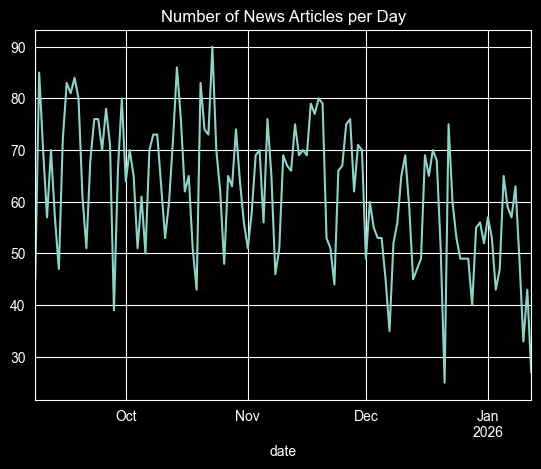

In [11]:
news_per_day.plot(kind="line", title="Number of News Articles per Day")

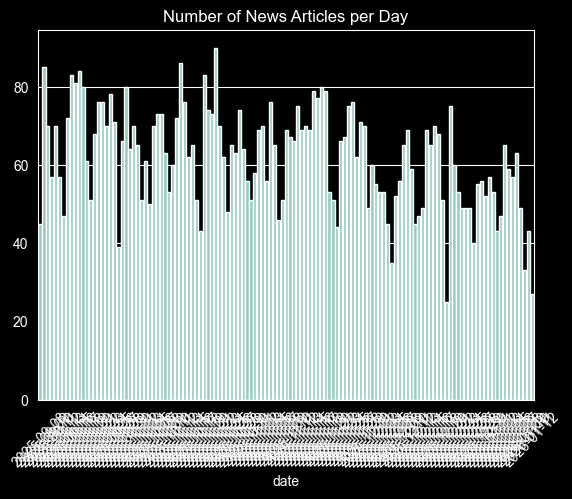

In [12]:
sns.barplot(x=news_per_day.index, y=news_per_day.values)
plt.xticks(rotation=45)
plt.title("Number of News Articles per Day")
plt.show()

In [13]:
count = df["date"].value_counts()
print(count)

date
2025-10-23    90
2025-10-14    86
2025-09-09    85
2025-09-18    84
2025-10-20    83
              ..
2025-09-28    39
2025-12-07    35
2026-01-10    33
2026-01-12    27
2025-12-21    25
Name: count, Length: 127, dtype: int64


In [14]:
from collections import Counter

text = " ".join(df["title"] + " " + df["description"])
words = text.split()

Counter(words).most_common(20)

[('සහ', 2138),
 ('බව', 1886),
 ('ශ්\u200dරී', 1729),
 ('අද', 1319),
 ('ඇති', 1179),
 ('සඳහා', 1178),
 ('කර', 1135),
 ('වන', 1133),
 ('ලංකා', 1016),
 ('-', 930),
 ('වූ', 920),
 ('කළ', 865),
 ('විසින්', 860),
 ('අත්අඩංගුවට', 814),
 ('ලෙස', 794),
 ('හිටපු', 673),
 ('කරන', 657),
 ('ක්\u200dරිකට්', 652),
 ('තිබෙනවා.', 622),
 ('සිට', 575)]

## Adding the lables for the news using the letters

In [15]:
def label_news(text):
    """
    Enhanced Sinhala news classification with improved keyword coverage
    and case-insensitive matching
    """
    # Convert to lowercase for case-insensitive matching
    text_lower = text.lower()

    # Define expanded keyword sets for each category
    politics_keywords = [
        "ජනාධිපති", "අගමැති", "පාර්ලිමේන්තු", "මන්ත්‍රී", "ඇමති",
        "විපක්ෂ", "රජය", "පක්ෂ", "ඡන්ද", "මැතිවරණ", "කැබිනට්",
        "දේශපාලන", "සභා", "ව්‍යවස්ථා", "පොහොට්ටුව", "එජාප",
        "ජවිපෙ", "නීති", "ආණ්ඩු", "රාජ්‍ය"
    ]

    sports_keywords = [
        "ක්‍රිකට්", "bpl", "icc", "ක්‍රීඩා", "තරඟ", "කණ්ඩායම",
        "ජයග්‍රහණය", "පරාජය", "තරඟාවලිය", "ලෝක කුසලාන",
        "ශ්‍රී ලංකා ක්‍රිකට්", "පාපන්දු", "පන්දු", "ක්‍රීඩක",
        "ප්‍රථම දෙස", "වික්කට්", "ලකුණු", "දිනුම්", "තරග",
        "ඔලිම්පික්", "ලෝක කුසලාන", "කණ්ඩායම්"
    ]

    international_keywords = [
        "ඉන්දියාව", "ඕස්ට්‍රේලියාව", "ප්‍රංශ", "ඇමෙරිකා",
        "චීනය", "රුසියාව", "බ්‍රිතාන්‍ය", "පාකිස්තාන",
        "දකුණු කොරියා", "ජපාන", "ජර්මනිය", "ඊජිප්තු",
        "තුර්කිය", "කැනඩා", "ජාත්‍යන්තර", "විදේශ",
        "ලෝක", "එක්සත් ජාතීන්", "යුද්ධ", "තානාපති"
    ]

    crime_keywords = [
        "අත්අඩංගුවට", "රිමාන්ඩ්", "අධිකරණ", "සොරකම්",
        "මිනීමැරුම්", "පොලිස්", "චෝදනා", "අපරාධ", "වැටලීම",
        "නඩු", "නීතිඥ", "සාක්ෂි", "විත්තිකරු", "දඬුවම",
        "බන්ධනාගාර", "හදිසි", "ප්‍රහාර", "මත්ද්‍රව්‍ය",
        "වංචා", "හිංසා", "සිරගත", "මිනීමැර"
    ]

    weather_keywords = [
        "වැසි", "අකුණු", "කාලගුණ", "කාලගුණය", "ගංවතුර",
        "නායයෑම්", "සුළං", "කුණාටු", "තද", "අනතුරු ඇඟවීම",
        "අධික", "බාධා", "කාලගුණ විද්‍යා", "උෂ්ණත්ව",
        "වර්ෂාපතන", "වියළි කාලගුණය", "තෙත්", "උෂ්ණ"
    ]

    business_keywords = [
        "ආර්ථික", "ව්‍යාපාර", "කොළඹ කොටස් වෙළඳපොළ",
        "බැංකු", "ණය", "වෙළඳ", "කර්මාන්ත", "සමාගම",
        "ආයෝජන", "විනිමය", "මුදල්", "ඩොලර්", "රුපියල්",
        "මූල්‍ය", "වැටුප්", "අපනයන", "ආනයන", "වෙළෙඳාම"
    ]

    health_keywords = [
        "සෞඛ්‍ය", "රෝහල්", "වෛද්‍ය", "රෝග", "ආසාදන",
        "එන්නත", "ඖෂධ", "ප්‍රතිකාර", "රෝගී", "කොවිඩ්",
        "වසංගත", "සෞඛ්‍ය අමාත්‍යාංශ", "වෛද්‍යවරු",
        "ශල්‍යකර්ම", "ක්ලිනික්", "සෞඛ්‍ය සේවා"
    ]

    education_keywords = [
        "අධ්‍යාපන", "පාසල්", "විශ්වවිද්‍යාල", "ශිෂ්‍ය",
        "ගුරු", "විභාග", "උපාධි", "ශිෂ්‍යත්ව", "පන්ති",
        "අධ්‍යාපන අමාත්‍යාංශ", "විභාගය", "ඉගෙනුම"
    ]

    # Score-based classification for better accuracy
    category_scores = {
        "Politics": sum(1 for k in politics_keywords if k.lower() in text_lower),
        "Sports": sum(1 for k in sports_keywords if k.lower() in text_lower),
        "International": sum(1 for k in international_keywords if k.lower() in text_lower),
        "Crime": sum(1 for k in crime_keywords if k.lower() in text_lower),
        "Weather": sum(1 for k in weather_keywords if k.lower() in text_lower),
        "Business": sum(1 for k in business_keywords if k.lower() in text_lower),
        "Health": sum(1 for k in health_keywords if k.lower() in text_lower),
        "Education": sum(1 for k in education_keywords if k.lower() in text_lower)
    }

    # Find category with highest score
    max_score = max(category_scores.values())

    # Return category with highest score, or "Other" if no matches
    if max_score > 0:
        return max(category_scores.items(), key=lambda x: x[1])[0]
    return "Other"


# Apply the enhanced classification
df["category"] = (df["title"] + " " + df["description"]).apply(label_news)

# Display distribution
print("Category Distribution:")
print(df["category"].value_counts())
print("\n" + "="*50)
print(f"Total articles: {len(df)}")
print(f"Categorized: {len(df[df['category'] != 'Other'])}")
print(f"Uncategorized (Other): {len(df[df['category'] == 'Other'])}")
print(f"Coverage: {len(df[df['category'] != 'Other'])/len(df)*100:.1f}%")

Category Distribution:
category
Politics         1737
Crime            1459
Other            1085
Business          886
Weather           821
Sports            807
International     632
Health            220
Education         201
Name: count, dtype: int64

Total articles: 7848
Categorized: 6763
Uncategorized (Other): 1085
Coverage: 86.2%


In [16]:
df.head()

,title,description,date,image_url,news_url,category
0,ලක්ෂ පහක අල්ලසක් ගත්තැයි වැලිමඩ අධිකරණයේ රෙජිස...,ඉඩමක භුක්තිය පැමිණිලිකරුවෙකුට ලබාදෙමින් වැලිමඩ...,2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440283/welimada-court-regi...,Crime
1,මත්ද්‍රව්‍ය සන්තකයේ තබාගෙන සිටියැයි නීතිඥවරයාට...,මාතර මිරිස්ස ප්‍රදේශයේ හොටලයක් තුළ සිටියදී කොක...,2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440282/lawyer-arrested-for...,Crime
2,රත්මලාන ප්‍රදේශයේ දී වළ දමා තිබූ උණ්ඩ දහසකට වැ...,"රත්මලාන, බොරුපන ප්‍රදේශයේ විද්‍යාලයක භූමියේ වළ...",2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440281/over-a-thousand-bul...,International
3,ගම්මන්පිල මල්වතු අස්ගිරි මහා නාහිමිවරුන් බැහැදකී,"වත්මන් ආණ්ඩුවේ දැක්ම රටට පටහැනි බවත්, නව අධ්‍ය...",2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440278/gammanpila-visits-t...,Politics
4,ඕස්ට්‍රේලියාවේ නව යෞවනයන්ගේ සෝෂල් මීඩියා ගිණුම...,ලොව ප්‍රථම වතාවට හඳුන්වා දුන් නීතියට අවනතන වෙම...,2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440272/australia-shuts-dow...,Politics


In [17]:
df.to_csv("filtered_hiru_news.csv", index=False, encoding="utf-8-sig")

# Train the model

In [18]:
df["text"] = df["title"] + " " + df["description"]

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label"] = le.fit_transform(df["category"])
df[["category", "label"]].head()

,category,label
0,Crime,1
1,Crime,1
2,International,4
3,Politics,6
4,Politics,6


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X = vectorizer.fit_transform(df["text"])
y = df["label"]


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [23]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.697452229299363
               precision    recall  f1-score   support

     Business       0.71      0.61      0.65       177
        Crime       0.75      0.77      0.76       292
    Education       0.87      0.33      0.47        40
       Health       0.89      0.18      0.30        44
International       0.46      0.33      0.39       126
        Other       0.51      0.71      0.59       217
     Politics       0.70      0.83      0.76       348
       Sports       0.96      0.82      0.88       162
      Weather       0.83      0.75      0.79       164

     accuracy                           0.70      1570
    macro avg       0.74      0.59      0.62      1570
 weighted avg       0.71      0.70      0.69      1570



In [24]:
def predict_category(title, description):
    text = title + " " + description
    vec = vectorizer.transform([text])
    pred = model.predict(vec)
    return le.inverse_transform(pred)[0]

predict_category(
    "ක්‍රිකට් ලෝක කුසලාන තරඟය අද",
    "ශ්‍රී ලංකා කණ්ඩායම අද තරඟයට පිවිසෙයි"
)

'Sports'

## Saving the test data

In [25]:
import joblib

joblib.dump(model, "news_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")

print("Model files saved successfully")

Model files saved successfully
